In [1]:
#Import of Basic Libraries
#Basic Libraries
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import io
sb.set()

In [2]:
movieDB = pd.read_csv('Data_Cleaning/allCleanedMovieData.csv')
movieDB.drop("Unnamed: 0", axis=1)
movieDB.head()

,Unnamed: 0,id,original_title,budget,revenue,release_date,popularity.1,vote_average,runtime,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,percentage_revenue,Won
0,0,5,Four Rooms,4000000.0,4257354.0,1995.0,22.784,5.744,98.0,32.033857,362.055,36.681,15.715714,225.920,27.939,106.43,False
1,1,6,Judgment Night,21000000.0,12136938.0,1993.0,11.530,6.543,109.0,14.834857,124.008,23.049,3.600143,32.165,5.436,57.79,False
2,2,11,Star Wars,11000000.0,775398007.0,1977.0,86.624,8.207,121.0,17.367714,297.868,37.206,7.543000,121.872,10.994,7049.07,True
3,3,12,Finding Nemo,94000000.0,940335536.0,2003.0,99.340,7.824,100.0,23.006429,467.094,41.251,8.758000,404.117,14.186,1000.36,True
4,4,13,Forrest Gump,55000000.0,677387716.0,1994.0,68.192,8.481,142.0,32.837571,526.057,99.618,6.422000,224.432,11.735,1231.61,True


In [3]:
movieDB['Won'].value_counts()

False    9016
True      596
Name: Won, dtype: int64

In [4]:
print(movieDB.dtypes)

Unnamed: 0                    int64
id                            int64
original_title               object
budget                      float64
revenue                     float64
release_date                float64
popularity.1                float64
vote_average                float64
runtime                     float64
top_casts_popularity_avg    float64
casts_popularity_sum        float64
top_cast_popularity         float64
top_crews_popularity_avg    float64
crews_popularity_sum        float64
top_crew_popularity         float64
percentage_revenue          float64
Won                            bool
dtype: object


<AxesSubplot: xlabel='percentage_revenue', ylabel='Won'>

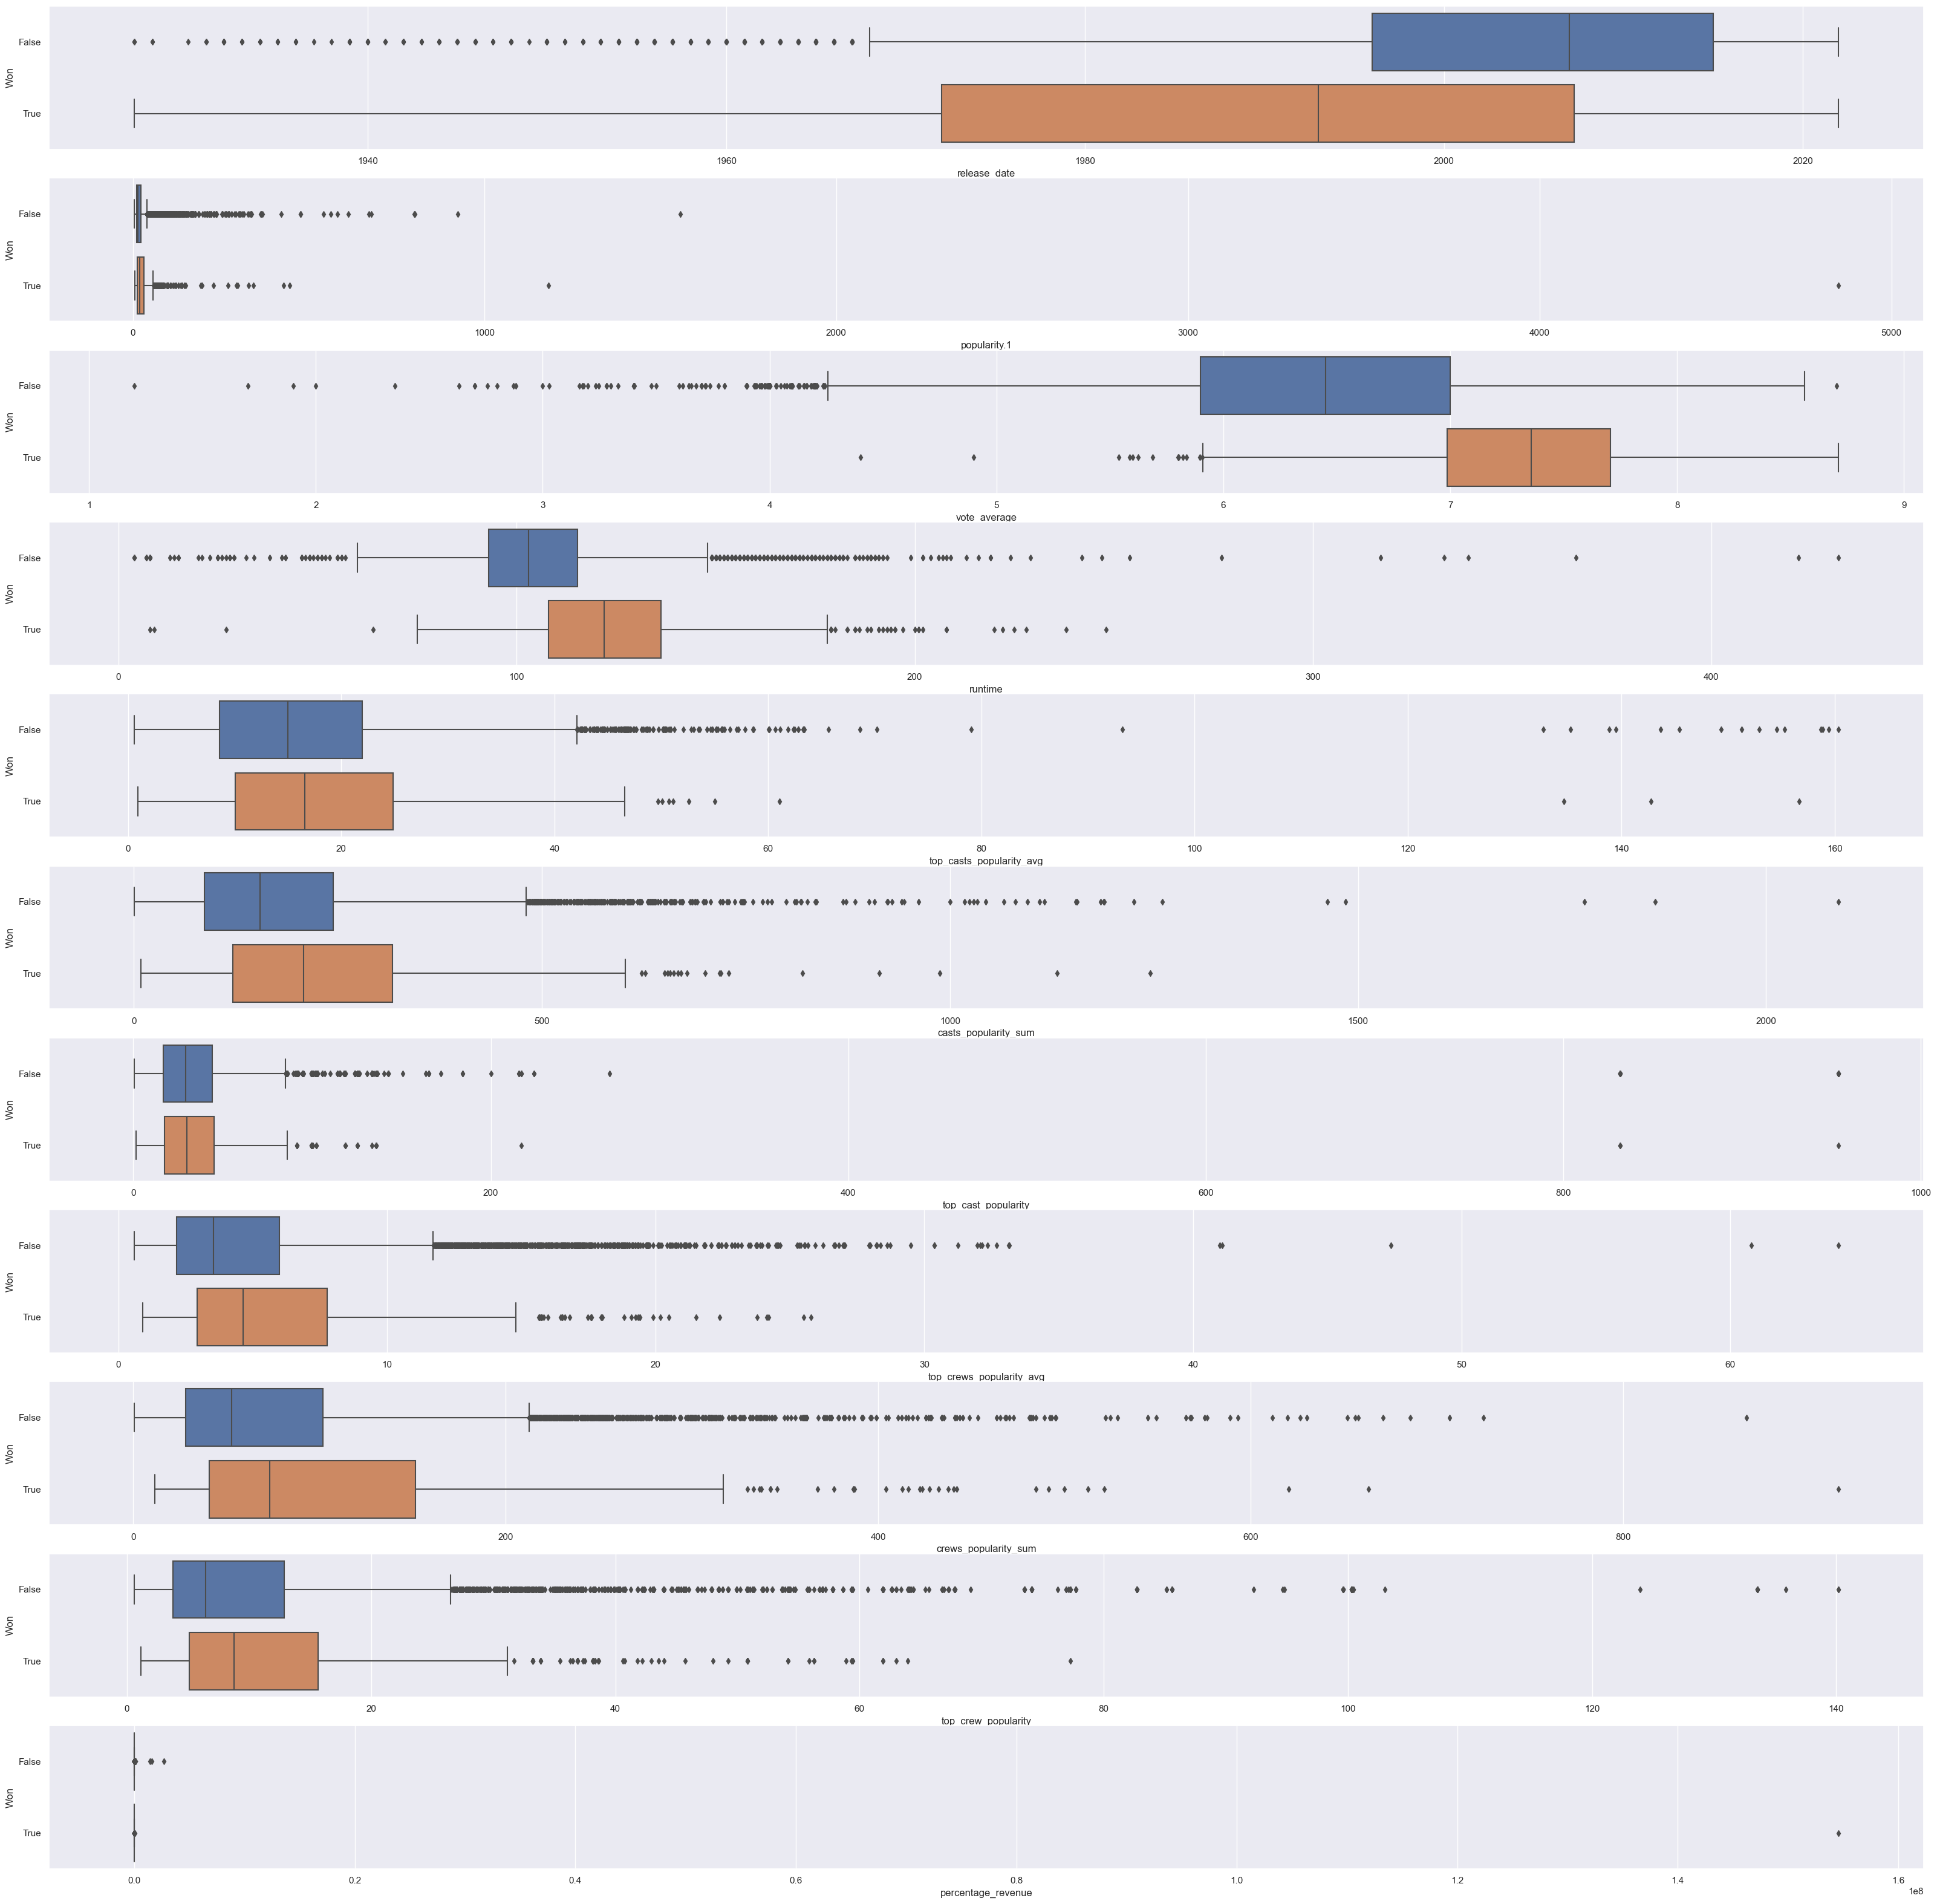

In [5]:
movieDB.drop("Unnamed: 0", axis=1)
f,axes = plt.subplots(11,1,figsize=(40,40))
sb.boxplot(x='release_date',y='Won',data=movieDB[['release_date','Won']],ax=axes[0],orient='h')
sb.boxplot(x='popularity.1',y='Won',data=movieDB[['popularity.1','Won']],ax=axes[1],orient='h')
sb.boxplot(x='vote_average',y='Won',data=movieDB[['vote_average','Won']],ax=axes[2],orient='h')
sb.boxplot(x='runtime',y='Won',data=movieDB[['runtime','Won']],ax=axes[3],orient='h')
sb.boxplot(x='top_casts_popularity_avg',y='Won',data=movieDB[['top_casts_popularity_avg','Won']],ax=axes[4],orient='h')
sb.boxplot(x='casts_popularity_sum',y='Won',data=movieDB[['casts_popularity_sum','Won']],ax=axes[5],orient='h')
sb.boxplot(x='top_cast_popularity',y='Won',data=movieDB[['top_cast_popularity','Won']],ax=axes[6],orient='h')
sb.boxplot(x='top_crews_popularity_avg',y='Won',data=movieDB[['top_crews_popularity_avg','Won']],ax=axes[7],orient='h')
sb.boxplot(x='crews_popularity_sum',y='Won',data=movieDB[['crews_popularity_sum','Won']],ax=axes[8],orient='h')
sb.boxplot(x='top_crew_popularity',y='Won',data=movieDB[['top_crew_popularity','Won']],ax=axes[9],orient='h')
sb.boxplot(x='percentage_revenue',y='Won',data=movieDB[['percentage_revenue','Won']],ax=axes[10],orient='h')

C:\Users\mdsya\AppData\Local\Temp\ipykernel_27104\204089618.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(movieDB.corr(), vmin=-1, vmax = 1, annot = True, fmt=".2f")


<AxesSubplot: >

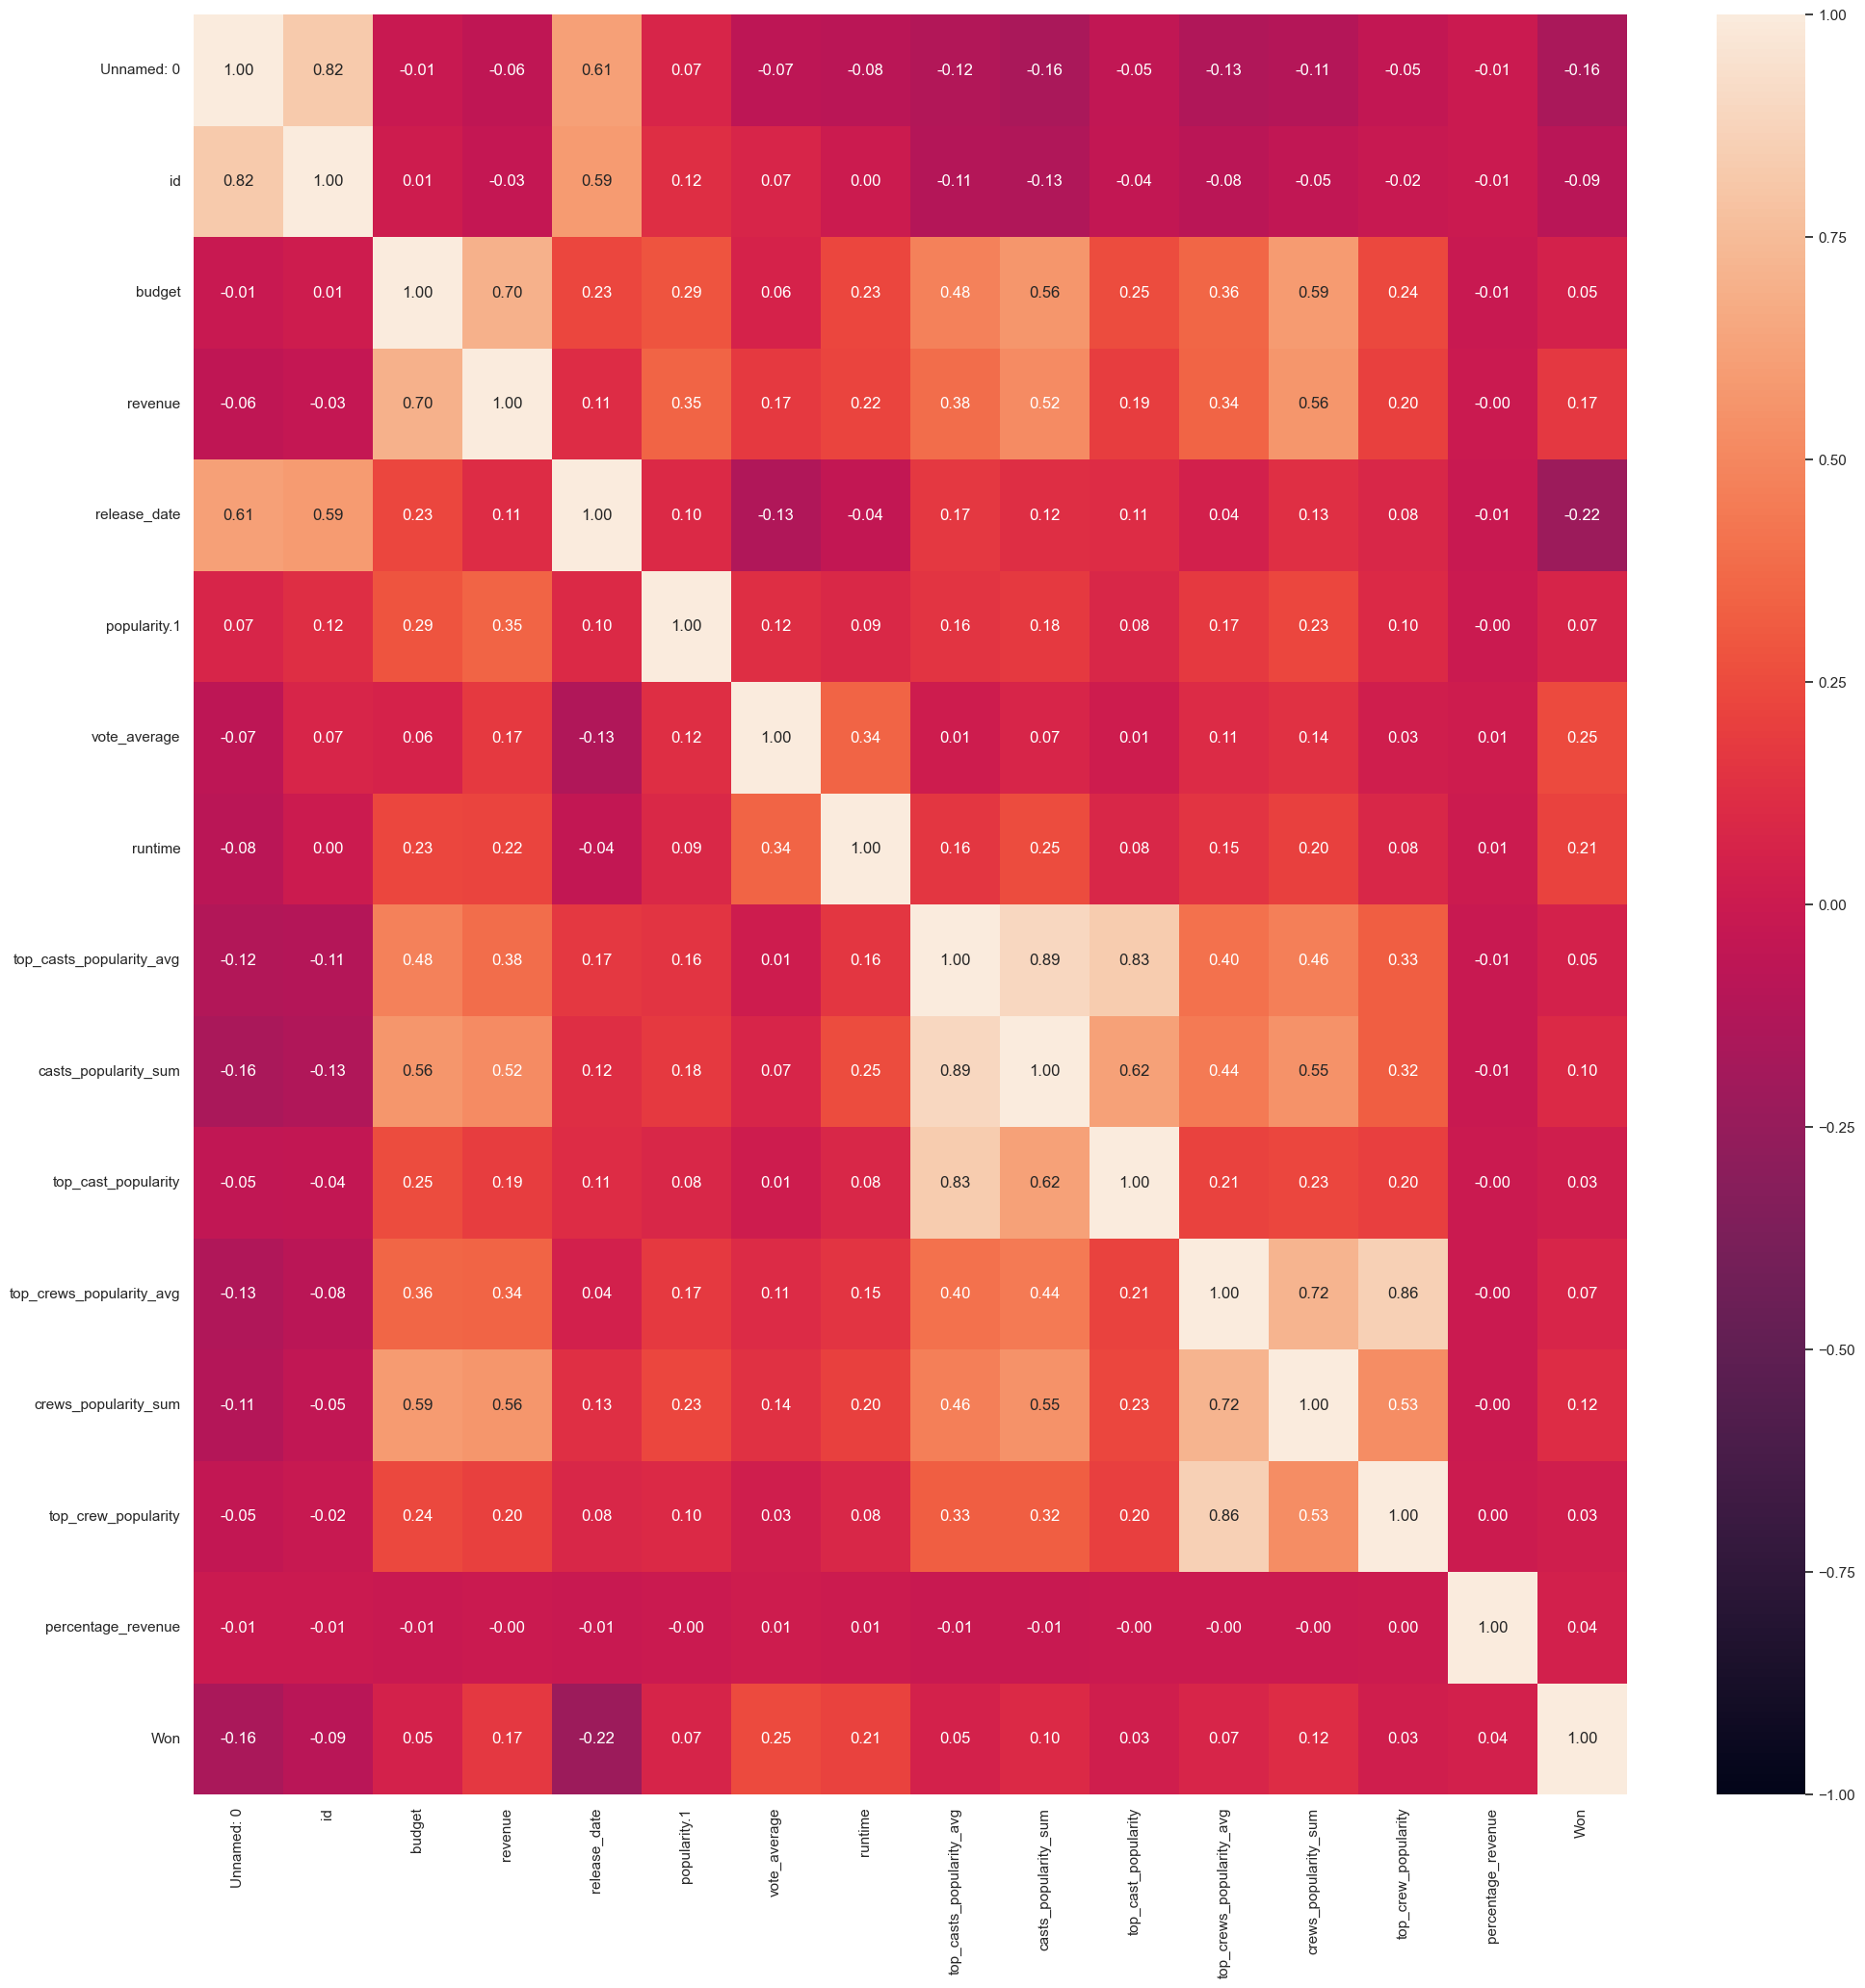

In [6]:
movieDB.drop("Unnamed: 0", axis=1)
f = plt.figure(figsize=(24,24))
sb.heatmap(movieDB.corr(), vmin=-1, vmax = 1, annot = True, fmt=".2f")

We can see that the following variables have some form of correlation with the movie winning; "vote_average", "runtime", "percentage_revenue", "cast_popularity" & "crew_popularity"